###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, C. Cooper, G.F. Forsyth, A. Krishnan.

# Phugoid Motion

Welcome to [**"Practical Numerical Methods with Python!"**](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about) This course is a collaborative, online, open education project, where we aim to give a foundation in scientific computing. The focus is on numerical solution of problems modeled by ordinary and partial differential equations.

This IPython Notebook introduces the problem we'll be studying in the **first module** of the course: the _phugoid model of glider flight_. We'll start with some background, explaining the physics, and working out the mathematical model. 

First, we'll look at an idealized motion where there is no drag, resulting in a simple harmonic motion. We can plot some interesting trajectories that will pique your imagination. In the next notebook, you'll learn to numerically integrate the differential equation using Euler's method. But hang on ... first things first. 

The term "phugoid" is used in aeronautics to refer to a motion pattern where an aircraft oscillates up and down —nose-up and climb, then nose-down and descend— around an equilibrium trajectory.  The aircraft oscillates in altitude, speed and pitch, with only small (neglected) variations in the angle of attack, as it repeatedly exchanges kinetic and potential energy.

A low-amplitude phugoid motion can be just a nuisance, as the aircraft does not exceed the stall angle of attack and nothing bad happens. But the mode can also be unstable leading to a stall or even a loop!

Look at this video showing a Cessna single-engine airplane in phugoid motion:

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ysdU4mnRYdM')

That doesn't look too good! What's happening? 

It can get a lot worse when an aircraft enters one of these modes that is unstable. For example, one of [NASA's Helios Solar Powered Aircraft](http://www.nasa.gov/centers/dryden/history/pastprojects/Helios/) prototype broke up in mid air due to extreme phugoid oscillations!

Helios was a proof-of-concept solar electric-powered flying wing that broke the world altitude record for a non-rocket-powered aircraft in August 2001. But in June 26, 2003, it broke something else. The aircraft entered phugoid motion after encountering turbulence near the Hawaiian Island of Kauai. The high speed in the oscillatory movement exceeded the design limits, and it ended up wrecked in the Pacific Ocean. Luckily, the Helios was remotely operated, and nobody got hurt.

## The physics of phugoids

The phugoid oscillation has the aircraft pitching up and down, as it decelerates and accelerates. The trajectory might look like a sinusoid, as in the figure below. The assumption is that the forward velocity of the aircraft, $v$, varies in such a way that the angle of attack remains (nearly) constant, which means that we can assume a constant lift coefficient.

![Image](./figures/oscillatory_trajectory.png)
####Figure 1. Trajectory of an aircraft in phugoid motion.

In the descending portion of the trajectory, the aircraft's velocity increases as it proceeds from a peak to the minimum height—gaining kinetic energy at the expense of potential energy. The contrary happens in the upward segment, as its velocity decreases there.

We measure the pitch angle (between the aircraft's longitudinal axis and the horizontal) as positive when the aircraft's nose is pointing up. In the portion of the trajectory below the center-line, where it curves upwards, the pitch angle $\theta$ is increasing: $\dot{\theta}>0$. And where the trajectory curves down, the pitch angle is decreasing: $\dot{\theta}<0$, as shown in the figure.

Let's remind ourselves of the forces affecting an aircraft in a downward glide. Look at the figure below: we show the flight path, the forces on the glider (no thrust), and the _glide angle_ or flight path angle, $\gamma$, between the flight path and the horizontal.

![Image](./figures/glider_forces.png)
####Figure 2. Forces on a glider.

The force of lift, $L$ —created by the airflow around the wings— is perpendicular to the trajectory, and the force of drag, $D$, is parallel to the trajectory. Both forces are expressed in terms of coefficients of lift and drag, $C_L$ and $C_D$, respectively, that depend on the wing design and _angle of attack_—the angle between the wing chord and the flight path.

If you are not familiar with airplane aerodynamics, you might be getting confused with some terms here ... and all those angles! But be patient and look things up, if you need to. We're giving you a quick summary here.

Lift and drag are proportional to a surface area, $S$, and the dynamic pressure: $1/2 \rho v^2$, where $\rho$ is the density of air, and $v$ the forward velocity of the aircraft. The equations for lift and drag are:

$$\begin{eqnarray}
L &=& C_L S \times \frac{1}{2} \rho v^2 \\
D &=& C_D S \times \frac{1}{2} \rho v^2
\end{eqnarray}$$

If the glider were in equilibrium, the forces would balance each other. We can equate the forces in the directions perpendicular and parallel to the trajectory, as follows:

$$\begin{equation}
L = W \cos \gamma \quad \text{and} \quad D = W \sin \gamma
\end{equation}$$

where $W$ repesents the weight of the glider.

In the figure, we've drawn the angle $\gamma$ as the _glide angle_, formed between the direction of motion and the horizontal. We are not bothered with the _sign_ of the angle, because we draw a free-body diagram and take the direction of the forces into account in writing our balance equations. But later on, we will need to be careful with the sign of the angles. It can cause you a real headache to keep this straight, so be patient!

It looks like we've set this up to do a little bit of mathematics. Are you ready?

But before, a short glimpse of the history.

## Lanchester's Aerodonetics

"Phugoid theory" was first described by the British engineer Frederick W. Lanchester in _"Aerodonetics"_ (1909). This book is so old that it is now in the public domain, so you can actually download [from Google Books](http://books.google.com/books?id=6hxDAAAAIAAJ&dq=%22phugoid%20theory%20deals%20with%20the%20longitudinal%20stability%22&pg=PA37#v=onepage&q=%22phugoid%20theory%20deals%20with%20the%20longitudinal%20stability%22&f=false) a PDF file of a scan, or read it online. 

Lanchester defines phugoid theory as the study of longitudinal stability of a flying machine (aerodone). He first considered the simplification where drag and moment of inertia are neglected. Then he included these effects, obtaining an equation of stability. In addition to describing many experiments by himself and others, Lanchester also reports on _"numerical work ... done by the aid of an ordinary 25-cm slide rule."_ Go figure!

### Ideal case of zero drag

In this section, we follow the derivation given by Milne-Thompson (1966), which we find a little bit easier than that of the original in "Aerodonetics"!

An aircraft flying in a steady, straight horizontal flight has a lift equal to its weight. The velocity in this condition is sometimes called _trim velocity_ ("trim" is what pilots do to set the controls to just stay in a steady flight). Let's use $v_t$ for the trim velocity, and from $L=W$ deduce that:

$$\begin{equation}
W = C_L S \times\frac{1}{2} \rho v_t^2
\end{equation}$$

The weight $W$ is constant for the aircraft, but the lift at any other flight condition depends on the flight speed, $v$. We can use the expression for the weight in terms of $v_t$ to obtain the ratio $L/W$ at any other flight velocity, as follows:

$$\begin{equation}
\frac{L}{W}= \frac{v^2}{v_t^2}
\end{equation}$$

Imagine that the aircraft experienced a little upset, a wind gust, and it finds itself off the "trim" level, in a curved path with an instantaneous angle $\theta$. In the sketch below, we exaggerate the curved trajectory of flight to help you visualize what we'll do next. The angle $\theta$ (using the same name as Milne-Thompson) is between the _trajectory_ and the horizontal, positive up.

![Image](./figures/glider_forces_nodrag.png)
####Figure 3. Curved trajectory of the aircraft going up.

A balance of forces now has to take into account that our reference frame is moving with the aircraft, in a rotating frame: we have a centrifugal force. The balance in the direction of lift is thus:

$$\begin{equation}
L- W \cos \theta = \frac{W}{g} \frac{v^2}{R}
\end{equation}$$

where $R$ is the radius of curvature of the trajectory, and $g$ the acceleration of gravity. Recall that the centrifugal acceleration is $v^2/R$. Rearrange this by dividing the equation by the weight, and use the expression we found for $L/W$, above. The following equation results:

$$\begin{equation}
\frac{v^2}{v_t^2}-\cos \theta = \frac{v^2}{g R}
\end{equation}$$

Recall that we simplified the problem assuming that there is no friction, which means that the total energy is constant (the lift does no work). If $z$ represents the depth below a reference horizontal line, the energy per unit mass is (kinetic plus potential energy):

$$\begin{equation}
\frac{1}{2}v^2-g z = \text{constant}
\end{equation}$$

To get rid of that pesky constant, we can choose the reference horizontal line at the level that makes the constant energy equal to zero, so $v^2 = 2 g z$. That helps us re-write the phugoid equation in terms of $z$ as follows:

$$\begin{equation}
\frac{z}{z_t}-\cos \theta = \frac{2z}{R}
\end{equation}$$

Let $ds$ represent a small arc-length of the trajectory. We can write 

$$\begin{equation}
\frac{1}{R} = \frac{d\theta}{ds} \quad \text{and}\quad  \sin\theta = -\frac{dz}{ds}
\end{equation}$$

Employing the chain rule of calculus,

$$\begin{equation}
\frac{1}{R} = \frac{d\theta}{ds} = \frac{dz}{ds}\frac{d\theta}{dz} = -\sin \theta\frac{d\theta}{dz}
\end{equation}$$

Multiply the phugoid equation by $\frac{1}{2\sqrt{z}}$ to get:

$$\begin{equation}
\frac{\sqrt{z}}{2z_t} - \frac{\cos\theta}{2\sqrt{z}} = \frac{\sqrt{z}}{R}
\end{equation}$$

Substituting for $1/R$ on the right hand side and bringing the cosine term over to the right, we get:

$$\begin{equation}
\frac{\sqrt{z}}{2z_t} = \frac{\cos \theta}{2 \sqrt{z}} - \sqrt{z} \sin \theta \frac{d\theta}{dz}
\end{equation}$$

The right-hand-side is an exact derivative! We can rewrite it as:

$$\begin{equation}
\frac{d}{dz} \left(\sqrt{z}\cos\theta \right) = \frac{\sqrt{z}}{2z_t}
\end{equation}$$

Integrating this equation, we add an arbitrary constant, chosen as $C\sqrt{z_t}$ which (after dividing through by $\sqrt{z}$) gives:

$$\begin{equation}
\cos \theta = \frac{1}{3}\frac{z}{z_t} + C\sqrt{\frac{z_t}{z}}
\end{equation}$$

Taking the derivative of both sides of equation (15) and applying the relations from equation (10) yields:

$$\begin{equation}
\frac{z_t}{R} = \frac{1}{3} - \frac{C}{2}\sqrt{\frac{z_t^3}{z^3}}
\end{equation}$$

Make sure you have followed the derivation, and perhaps write it out on paper!

## Phugoid Curves

Equation (15) is non-linear, which usually means we are hard-pressed to write a clean expression for the variable of interest, $z$.  In fact, Lanchester himself said that he was unable to _"reduce this expression to a form suitable for co-ordinate plotting."_ If the great polymath couldn't do it, we can't either!

But Lanchester _was_ able to plot a suitable approximation of the phugoid flight path using what he called the "trammel" method.  If you're interested in seeing how he did it, his explanation begins on page [48 of Aerodonetics](http://books.google.com/books?id=6hxDAAAAIAAJ&pg=PA49&lpg=PA48&dq=aerodonetics+the+use+of+the+trammel&source=bl&ots=lB6EVKYQuT&sig=aVE2kiDWZoWftaWczMIrcYftMOs&hl=en&sa=X&ei=gTD_U82fGYjzgwT3moGwCQ&ved=0CCAQ6AEwAA#v=onepage&q=aerodonetics%20the%20use%20of%20the%20trammel&f=false).  It's a trip.

Lanchester used Equations (15) and (16) to solve for the constant $C$ and the radius of curvature $R$ and then iteratively plotted small arcs of the phugoid path. By hand.

We wrote a neat little code that duplicates the manual trammel method, but it might be a bit much for you to absorb in the first lesson.  If you want to look it over, you are more than welcome to.  If you are just starting with Python, skip it for the moment and we'll return to it at the end of this module.  

###Plotting the flight path

As we mentioned, we wrote a Python code to reproduce programmatically what Lanchester did graphically. Here's a neat feature of IPython Notebooks: you can run external programs with the magical keyword ... wait for it ... `run`. And the jargon of IPython _is_ to call this "magic." In fact, there are a bunch of [magic functions](http://ipython.org/ipython-doc/dev/interactive/tutorial.html) that you will learn about. They will make you a happy camper.

Let's do it:

In [9]:
%run phugoid.py
%matplotlib inline

This code cell loaded our simulated-trammel code, `phugoid.py`. The code defined a function for you in the background, called `plot_flight_path`, taking three inputs: $z_t$, $z$ and $\theta$.  

Look again at Equation (15), where we take the positive square root. There are several possibilities, depending on the value that the constant $C$ takes. 

* There are no physical solutions for $C>2/3$, because it would result in $\cos\theta>1$. 

* If $C=2/3$, then the solution is a horizontal straight line, because $\cos\theta=1$, $\theta=0$ and $R=\infty$.

* Any value of $C$ for which $0 < C < \frac{2}{3}$ will produce "trochoidal"-like paths.  What does this look like? Let's use our custom function `plot_flight_path` to find out!

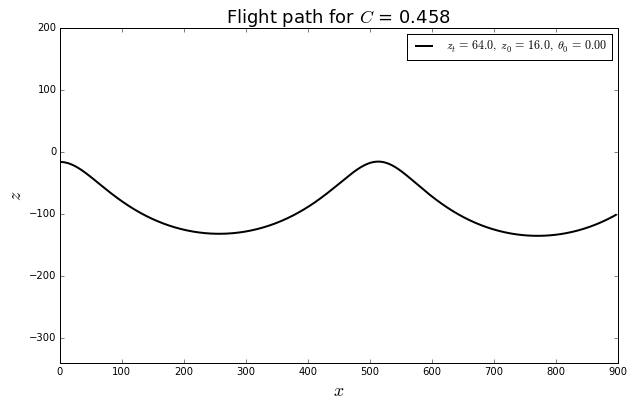

In [10]:
#zt = 64, z = 16, theta=0
plot_flight_path(64, 16, 0)

Cool!  Note that the plot title tells us what the calculated value of $C$ was for our input conditions.  We have a value of $C$ between $0$ and $\frac{2}{3}$ and our path is trochoidal, like we announced it would be.

* For negative values of $C$, the resultant flight path consists of a series of loops.  Let's try it out!

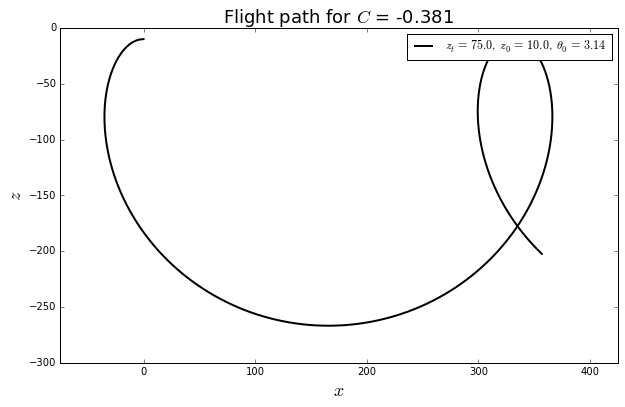

In [14]:
plot_flight_path(75,10,numpy.pi)

You can play around with the input values and see what kind of behavior results.  Just note that any value of $C > \frac{2}{3}$ will result in $\cos \theta > 1$, which doesn't exist.  Python will probably throw a few errors if you hit that condition, but just try again!

* The last case is $C = 0$.  Take another look at Equation (16) and plug in $C = 0$, what should happen? It looks like it will just reduce to 

$$R = 3z_t$$

It's a constant radius of curvature!  In fact, this solution is a series of semi-circles, with a cusp between them. One way to force $C = 0$ that we can figure out from Equation (15), is to make:


$$z = 3z_t\ \ \ ,\ \ \  \theta = 0$$

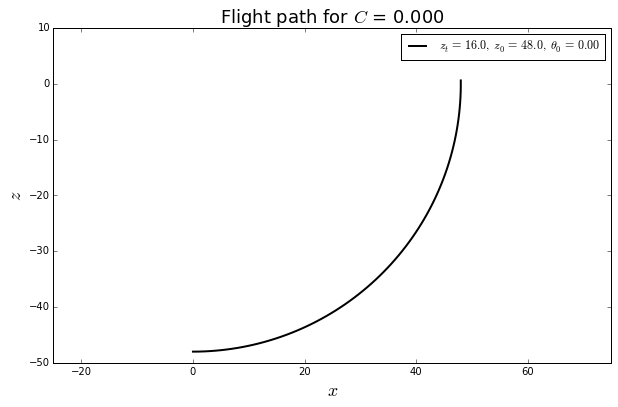

In [5]:
plot_flight_path(16,48,0.)

That looks an awful lot like a quarter circle.  And what's the radius of the arc?  It's $$r = 48 = 3z_t.$$

We can also get a semi-circle out of our simulated trammel by changing to another configuration where $C$ is (near) zero. Here's one example:

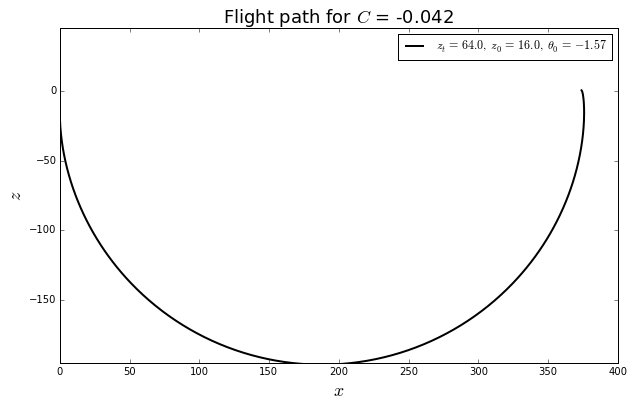

In [6]:
plot_flight_path(64,16,-numpy.pi/2)

That is so nice. We have reproduced the trajectories that Lanchester found more than a hundred years ago, painstakingly drawing them by hand with a contraption called a "trammel." It must have taken him days!

Here is how the different phugoid curves are drawn in von Kármán's book, _Aerodynamics_ (1957). He never says _how_ he drew them, but we're guessing by hand, also. We did pretty good!

![Image](./figures/vonKarman-phugoids.png)

####Figure 4. Phugoid curves in von Kármán (1957).

In the next notebook of this series, we'll look at the differential equation that arises when you consider small perturbations on the horizontal phugoid, and we'll learn to numerically integrate that to get the flight paths.

## References

1. Lanchester, F. W. _Aerodonetics_, D. van Nostrand Company: New York, 1909. On the public domain. [Get it from Google Books](http://books.google.com/books?id=6hxDAAAAIAAJ&pg=PP1#v=onepage&q&f=false).

2. Milne-Thompson, L. M. _Theoretical Aerodynamics_, Dover 2012 reprint of the revised 1966 edition. [Read on Google Books](http://books.google.com/books?id=EMfCAgAAQBAJ&lpg=PP1&pg=PP1#v=onepage&q&f=false) (see section 18.5)

3. Sinha, N. K. and Ananthkrishnan, N. _Elementary Flight Dynamics with an introduction to Bifurcation and Continuation Methods_, CRC Press, 2013. [Read on Google Books](http://books.google.com/books?id=yXL6AQAAQBAJ&lpg=PP1&pg=PP1#v=onepage&q&f=false) (see chapter 5)

4. von Kármán, T. _Aerodynamics_, Dover 2004 reprint of the 1957 2nd edition. (see pages 149–151)

## About this course

This course is a collaborative project in open education. Three professors across the world are teaching connected courses, developing and reviewing course materials, and interacting with the community of learners that follow the course online. They are:

* Lorena A. Barba, the George Washington University, United States
* Carlos Jerez, Pontificia Universidad Católica de Chile
* Ian Hawke, Southampton University, United Kingdom

---

######The cell below loads the style of this notebook. 

In [7]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())